# Практическая работа 4

### Импорт библиотек

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.linear_model import LinearRegression

## Задание 1

#### 1.1

In [3]:
st = np.array([80, 98, 75, 91, 78])
gr = np.array([100, 82, 105, 89, 102])

np.corrcoef(st, gr)[0, 1]

-0.9999999999999998

#### 1.2

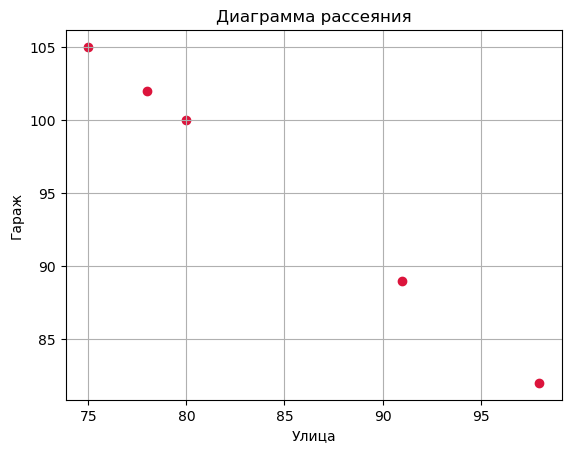

In [6]:
plt.grid(True)
plt.title("Диаграмма рассеяния")
plt.xlabel("Улица")
plt.ylabel("Гараж")

plt.scatter(st, gr, marker='o', color="crimson")

## Задание 2

#### 2.1

In [6]:
data_m = pd.read_csv('train.csv', sep=';')

data_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [50]:
df = pd.DataFrame(data_m, columns=
                  ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'])

corr_matrix = df.corr().cardio.to_frame().round(3)
corr_matrix.style.background_gradient(cmap='coolwarm')

,cardio
cholesterol,0.221000
gluc,0.089000
smoke,-0.015000
alco,-0.007000
active,-0.036000
cardio,1.000000


In [68]:
model = LinearRegression()

X = data_m[['gluc']]
X = np.array(X, type(float))
y = data_m['cardio']
y = np.array(y, type(float))

model.fit(X, y)

print(f"Угол наклона {model.coef_}")

print(f"Коэффициент сдвига {model.intercept_}")

Угол наклона [0.07802913]
Коэффициент сдвига 0.40400061021973377


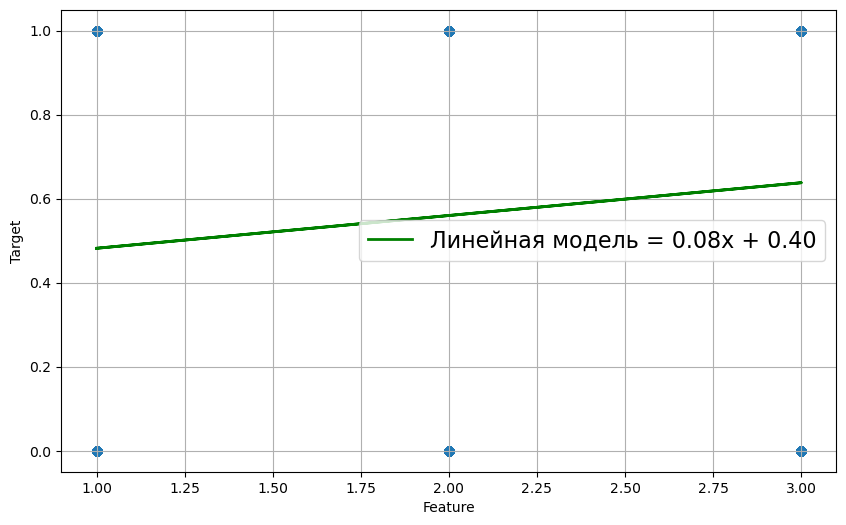

In [69]:
model_a = model.coef_[0]
model_b = model.intercept_

model_y = model_a * X + model_b

fig = plt.figure(figsize=(10,6))
plt.plot(X, model_y, linewidth = 2, color='g', 
         label = f'Линейная модель = {model.coef_[0]:.2f}x + {model.intercept_:.2f}')
plt.scatter(X, y, alpha=0.7)
plt.grid()
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend(prop={'size':16})
plt.show()

In [75]:
def mseerror(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    return np.sum((y-y_pred) ** 2)/ len(y_pred)

def gr_mseerror(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    return np.array([2/len(X)*np.sum((y-y_pred)) * (-1),
                     2/len(X)*np.sum((y-y_pred) * (-X[:, 0]))])

eps = 0.0001
w1 = 0
w0 = 0

learning_rate = 0.001

next_w1 = w1
next_w0 = w0

n = 100000

for i in range (n):
    cur_w1 = next_w1
    cur_w0 = next_w0

    next_w0 = cur_w0 - learning_rate * gr_mseerror(X, cur_w1, cur_w0, y)[0]
    next_w1 = cur_w1 - learning_rate * gr_mseerror(X, cur_w1, cur_w0, y)[1]

    print(f'Итерация: {i}')
    print(f'текущая точка {cur_w1, cur_w0} | Следующая {next_w1, next_w0}')
    print(f"gluc {mseerror(X, cur_w1, cur_w0, y)}")
    print("-----------------------")

Итерация: 0
текущая точка (0, 0) | Следующая (0.0012768285714285714, 0.0009994)
gluc 0.4997
-----------------------
Итерация: 1
текущая точка (0.0012768285714285714, 0.0009994) | Следующая (0.0025465282030120895, 0.0019936692489575655)
gluc 0.49707802349259894
-----------------------
Итерация: 2
текущая точка (0.0025465282030120895, 0.0019936692489575655) | Следующая (0.0038091375959986963, 0.0029828354950510675)
gluc 0.4944843531145627
-----------------------
Итерация: 3
текущая точка (0.0038091375959986963, 0.0029828354950510675) | Следующая (0.00506469524179201, 0.003966926336035752)
gluc 0.49191868278378365
-----------------------
Итерация: 4
текущая точка (0.00506469524179201, 0.003966926336035752) | Следующая (0.0063132394230960304, 0.004945969220051485)
gluc 0.4893807097273066
-----------------------
Итерация: 5
текущая точка (0.0063132394230960304, 0.004945969220051485) | Следующая (0.007554808215042805, 0.0059199914464406)
gluc 0.4868701344463102
-----------------------
Итерац

KeyboardInterrupt: 

## Задание 3

In [4]:
data = pd.read_csv('insurance.csv')

data.info()

regions = data.region.unique()
print(f"Список уникальных регионов: {regions}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Список уникальных регионов: ['southwest' 'southeast' 'northwest' 'northeast']


#### 3.1

In [6]:
groups = data.groupby('region').groups

southwest = data['bmi'][groups['southwest']]
southeast = data['bmi'][groups['southeast']]
northwest = data['bmi'][groups['northwest']]
northeast = data['bmi'][groups['northeast']]

anova_scipy = stats.f_oneway(southwest, southeast, northwest, northeast)
print(f"Тест ANOVA через scipy:\n{anova_scipy}")

Тест ANOVA через scipy:
F_onewayResult(statistic=39.49505720170283, pvalue=1.881838913929143e-24)


#### 3.2

In [34]:
model = ols('bmi ~ region', data=data).fit()
anova_stats = sm.stats.anova_lm(model, typ = 2)
print(f"Тест ANOVA через statsmodels:\n{anova_stats}")

Тест ANOVA через statsmodels:
                sum_sq      df          F        PR(>F)
region     4055.880631     3.0  39.495057  1.881839e-24
Residual  45664.319755  1334.0        NaN           NaN


#### 3.3

In [8]:
regions_stu = []
for r1 in range(3):
    for r2 in range(r1+1, 4):
        regions_stu.append((regions[r1], regions[r2]))

for r1, r2 in regions_stu:
    test_result = stats.ttest_ind(data['bmi'][groups[r1]], data['bmi'][groups[r2]])
    print(f"R1: {r1}, R2 {r2}\nРезультат: {test_result}")

R1: southwest, R2 southeast
Результат: Ttest_indResult(statistic=-5.908373821545118, pvalue=5.4374009639680636e-09)
R1: southwest, R2 northwest
Результат: Ttest_indResult(statistic=3.2844171500398582, pvalue=0.001076958496307695)
R1: southwest, R2 northeast
Результат: Ttest_indResult(statistic=3.1169000930045923, pvalue=0.0019086161671573072)
R1: southeast, R2 northwest
Результат: Ttest_indResult(statistic=9.25649013552548, pvalue=2.643571405230106e-19)
R1: southeast, R2 northeast
Результат: Ttest_indResult(statistic=8.790905562598699, pvalue=1.186014937424813e-17)
R1: northwest, R2 northeast
Результат: Ttest_indResult(statistic=0.060307727183293185, pvalue=0.951929170821864)


#### 3.4

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,0.0263,0.9999,-1.1552,1.2078,False
northeast,southeast,4.1825,0.0,3.033,5.332,True
northeast,southwest,1.4231,0.0107,0.2416,2.6046,True
northwest,southeast,4.1562,0.0,3.0077,5.3047,True
northwest,southwest,1.3968,0.0127,0.2162,2.5774,True
southeast,southwest,-2.7594,0.0,-3.9079,-1.6108,True


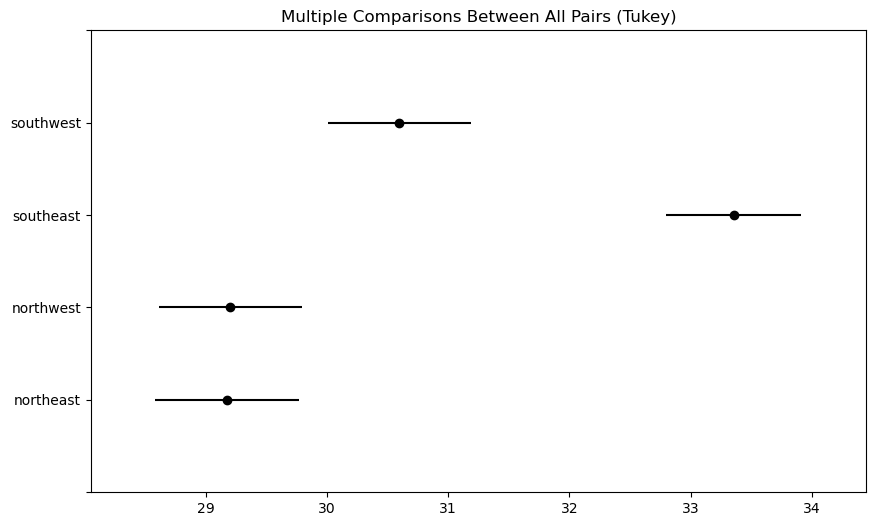

In [11]:
tukey = pairwise_tukeyhsd(endog= data['bmi'], groups = data['region'], alpha=0.05)
tukey.plot_simultaneous()
plt.vlines(x = 49.57, ymin= -0.5, ymax = 4.5, color = 'green')
tukey.summary()

#### 3.5

In [14]:
model2 = ols('bmi ~ C(region) + C(sex) + C(region):C(sex)', data=data).fit()
anova_stats2 = sm.stats.anova_lm(model2, typ=2)
print(f"Двухфакторный тест ANOVA через statsmodels:\n{anova_stats2}")

Двухфакторный тест ANOVA через statsmodels:
                        sum_sq      df          F        PR(>F)
C(region)          4034.975135     3.0  39.398134  2.163195e-24
C(sex)               86.007035     1.0   2.519359  1.126940e-01
C(region):C(sex)    174.157808     3.0   1.700504  1.650655e-01
Residual          45404.154911  1330.0        NaN           NaN


#### 3.6

group1,group2,meandiff,p-adj,lower,upper,reject
northeast / female,northeast / male,-0.2998,0.9998,-2.2706,1.6711,False
northeast / female,northwest / female,-0.0464,1.0,-2.0142,1.9215,False
northeast / female,northwest / male,-0.2042,1.0,-2.1811,1.7728,False
northeast / female,southeast / female,3.3469,0.0,1.41,5.2839,True
northeast / female,southeast / male,4.6657,0.0,2.7634,6.568,True
northeast / female,southwest / female,0.7362,0.9497,-1.2377,2.71,False
northeast / female,southwest / male,1.8051,0.1007,-0.1657,3.776,False
northeast / male,northwest / female,0.2534,0.9999,-1.7083,2.2152,False
northeast / male,northwest / male,0.0956,1.0,-1.8752,2.0665,False
northeast / male,southeast / female,3.6467,0.0,1.7159,5.5775,True


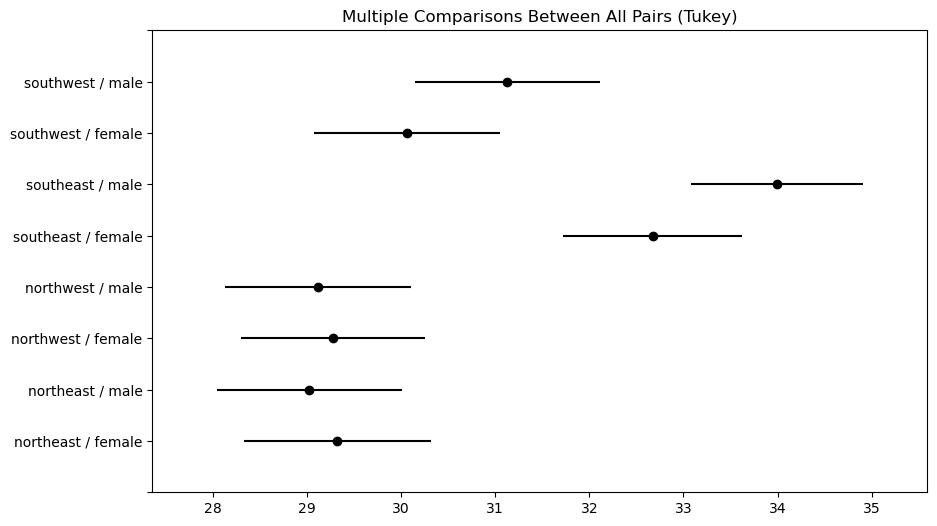

In [17]:
data['combination'] = data.region + " / " + data.sex
tukey = pairwise_tukeyhsd(endog= data['bmi'], groups = data['combination'], alpha=0.05)
tukey.plot_simultaneous()
tukey.summary()